In [1]:
import pandas as pd
import zipfile
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zf = zipfile.ZipFile('/content/drive/MyDrive/IA1s2023/Data/House_Sale/House_Sale.zip')  #aloca o arquivo zip

data = pd.read_csv(zf.open('kc_house_data.csv')) # abre o arquivo CSV 'train.csv' presente dentro do ZIP

In [4]:
#Checks the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Check for null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
np.where(data['sqft_above'].isnull().values==True)

(array([10, 17]),)

In [7]:
data = data.drop([10, 17])

In [8]:
#Check for correlation between the data
corr = data.corr()
corr

<ipython-input-8-944c246e0d51>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016742,0.001243,0.005237,-0.012166,-0.132110,0.018484,-0.002722,0.011590,-0.023846,0.008165,-0.010830,-0.004983,0.021442,-0.016910,-0.008303,-0.001905,0.020856,-0.002866,-0.138798
price,-0.016742,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.054006,0.126436,-0.053182,0.307010,0.021613,0.585377,0.082448
bedrooms,0.001243,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.154248,0.018844,-0.152717,-0.008950,0.129516,0.391670,0.029252
bathrooms,0.005237,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.505968,0.050733,-0.203825,0.024619,0.222987,0.568626,0.087163
sqft_living,-0.012166,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.318066,0.055377,-0.199342,0.052530,0.240187,0.756440,0.183301
sqft_lot,-0.132110,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,0.053061,0.007640,-0.129583,-0.085673,0.229519,0.144605,0.718556
floors,0.018484,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.006330,-0.059181,0.049628,0.125446,0.279907,-0.011275
waterfront,-0.002722,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,-0.026172,0.092883,0.030283,-0.014270,-0.041913,0.086463,0.030702
view,0.011590,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,-0.053474,0.103912,0.084819,0.006172,-0.078408,0.280440,0.072569
condition,-0.023846,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,0.016655,0.045995,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.060617,0.002967,-0.014965,-0.106453,-0.092795,-0.003397


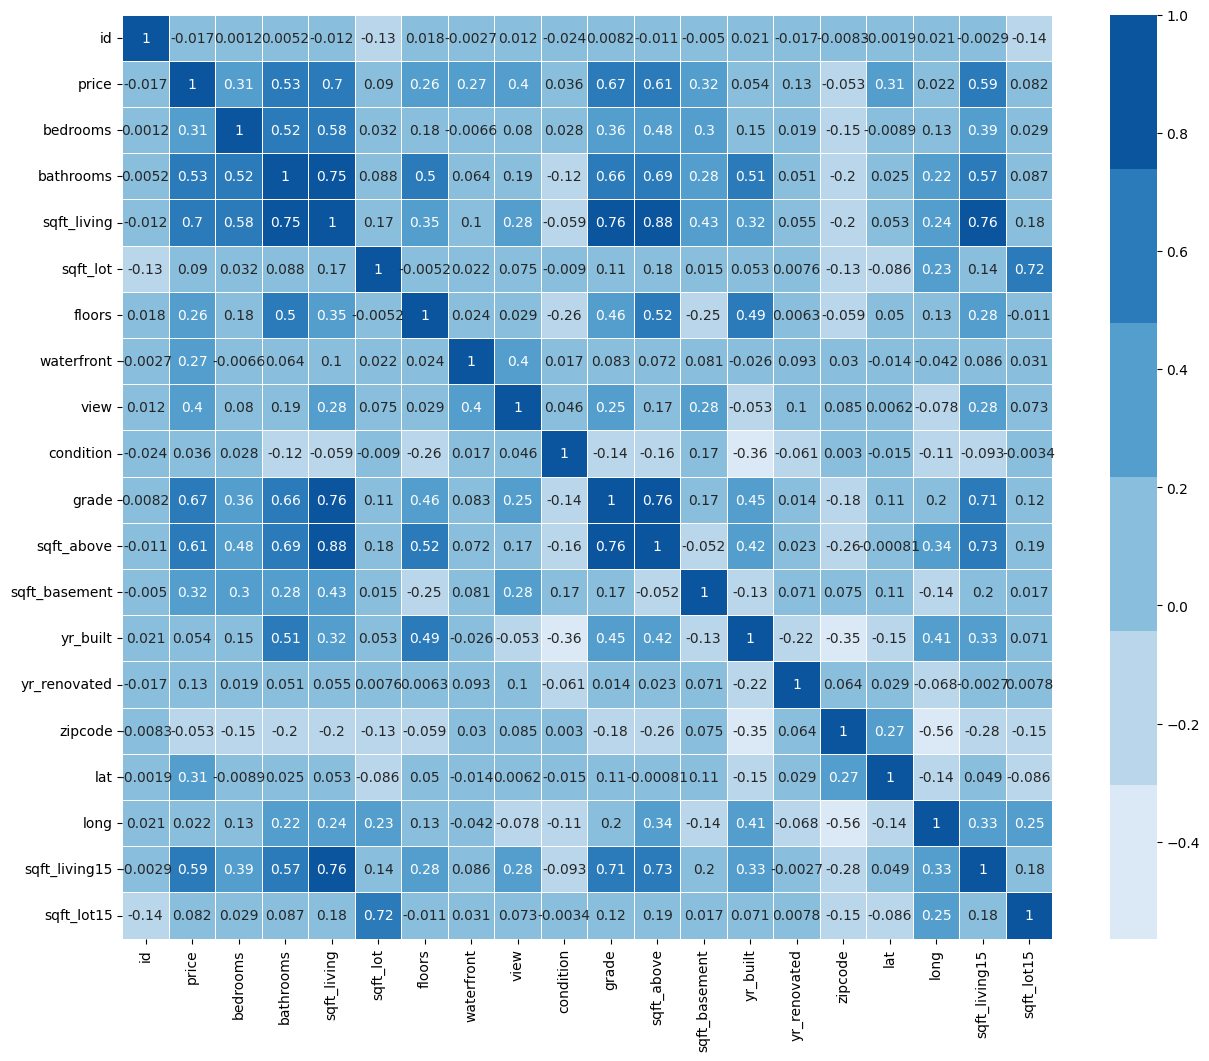

In [9]:
# Better visualization
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [10]:
#Create a new data set without the values that won't help in training (Have small correlation with price)
data = data.sample(frac = 1.0)
data_red = data.copy(deep=True)
data_red = data_red.drop(['id', 'date', 'condition', 'yr_built', 'lat', 'long', 'zipcode'], axis=1)
data_red.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
6139,425000.0,2,1.00,1300,11080,1.0,0,0,7,1300.0,0,0,1600,9259
19043,872000.0,4,2.25,2860,40284,2.0,0,0,10,2860.0,0,0,2670,92782
13928,750000.0,4,2.75,1750,5080,1.5,0,0,8,1750.0,0,0,1700,4572
11673,1730000.0,5,3.50,5000,26540,2.0,0,3,10,3410.0,1590,0,3360,17398
193,400000.0,3,2.50,2180,7508,1.0,0,0,7,1420.0,760,0,1900,7818


In [11]:
#Import Torch
import torch
import torch.nn as nn
import torch.optim as optim

In [12]:
#Define our Neural Networks for the Regression task
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    #self.dropout = nn.Dropout(p=0.1)
    self.fc1 = nn.Linear(13, 52)
    self.fc2 = nn.Linear(52, 26)
    self.fc3 = nn.Linear(26, 13)
    self.fc4 = nn.Linear(13, 1)

  def forward(self, x):
    #x = self.dropout(x)
    x = x.view(-1, 13)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = x + (0.1**0.5)*torch.randn(26)
    x = torch.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [13]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 11.0 MB/s eta 0:00:00


In [14]:
# Define the loss function and optimizer
from torchmetrics import MeanAbsolutePercentageError
nets = [Net()] * 5
optimizers = [optim.Adam(nets[x].parameters(), lr=0.1) for x in range(5)]

criterion = MeanAbsolutePercentageError()

list_loss_scores = np.array([])

In [15]:
#Keep track of the best NNs found
best_nn = [Net()] * 5
best_loss = [-1.0] * 5

In [16]:
#Define 5 fold cross validation
from sklearn.model_selection import KFold

y = data_red['price']
X = data_red.iloc[:, 1:14]
print(y.shape)
print(X.shape)

kf = KFold(n_splits=5,shuffle=False) # definir quantas partes
kf.get_n_splits(X)

(21611,)
(21611, 13)


5

In [17]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print (train_index, test_index)

[ 4323  4324  4325 ... 21608 21609 21610] [   0    1    2 ... 4320 4321 4322]
[    0     1     2 ... 21608 21609 21610] [4323 4324 4325 ... 8642 8643 8644]
[    0     1     2 ... 21608 21609 21610] [ 8645  8646  8647 ... 12964 12965 12966]
[    0     1     2 ... 21608 21609 21610] [12967 12968 12969 ... 17286 17287 17288]
[    0     1     2 ... 17286 17287 17288] [17289 17290 17291 ... 21608 21609 21610]


In [18]:
# Train the neural network
best_loss_current = -1
best_loss_index = 0
predicted_vals = []
predicted_diffs = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"\nFold {i}:")
  X_train = X.values[train_index]
  X_train = torch.tensor(X_train)
  X_train = X_train.float()

  y_train = y.values[train_index]
  y_train = torch.tensor(y_train)
  y_train = y_train.float()
    
  X_test = X.values[test_index]
  X_test = torch.tensor(X_test)
  X_test = X_test.float()

  y_test = y.values[test_index]

  nets[i].train()
  for epoch in range(5000):
      outputs = nets[i](X_train) 
      loss = criterion(outputs.flatten(), y_train)
      loss.backward()
      optimizers[i].step()
      optimizers[i].zero_grad()
      if (epoch+1) % 500 == 0:
        print('Epoch %d, Loss: %.4f' % (epoch+1, loss.item()))
      if (best_loss[i] == -1):
        best_loss[i] = loss.item()
      if (best_loss[i] > loss.item()):
        best_loss[i] = loss.item()
        best_nn[i] = Net()
        best_nn[i].load_state_dict(nets[i].state_dict())
      if best_loss_current == -1:
        best_loss_current = loss.item()
        best_loss_index = i
      if best_loss_current > loss.item():
        best_loss_current = loss.item()
        best_loss_index = i
  predicted_vals.append((best_nn[i](X_test)).detach().numpy())
  predicted_diffs.append(np.absolute(y_test - (nets[0](X_test).detach().numpy()).flatten()))


Fold 0:
Epoch 500, Loss: 0.2804
Epoch 1000, Loss: 0.2757
Epoch 1500, Loss: 0.2711
Epoch 2000, Loss: 0.2690
Epoch 2500, Loss: 0.2609
Epoch 3000, Loss: 0.2612
Epoch 3500, Loss: 0.2588
Epoch 4000, Loss: 0.2666
Epoch 4500, Loss: 0.2578
Epoch 5000, Loss: 0.2572

Fold 1:
Epoch 500, Loss: 0.2657
Epoch 1000, Loss: 0.2645
Epoch 1500, Loss: 0.2579
Epoch 2000, Loss: 0.2649
Epoch 2500, Loss: 0.2583
Epoch 3000, Loss: 0.2690
Epoch 3500, Loss: 0.2664
Epoch 4000, Loss: 0.2672
Epoch 4500, Loss: 0.2655
Epoch 5000, Loss: 0.2668

Fold 2:
Epoch 500, Loss: 0.2643
Epoch 1000, Loss: 0.2593
Epoch 1500, Loss: 0.2598
Epoch 2000, Loss: 0.2680
Epoch 2500, Loss: 0.2646
Epoch 3000, Loss: 0.2606
Epoch 3500, Loss: 0.2587
Epoch 4000, Loss: 0.2705
Epoch 4500, Loss: 0.2555
Epoch 5000, Loss: 0.2758

Fold 3:
Epoch 500, Loss: 0.2632
Epoch 1000, Loss: 0.2676
Epoch 1500, Loss: 0.2646
Epoch 2000, Loss: 0.2654
Epoch 2500, Loss: 0.2707
Epoch 3000, Loss: 0.2660
Epoch 3500, Loss: 0.2668
Epoch 4000, Loss: 0.2728
Epoch 4500, Loss: 

In [19]:
print(best_loss)
print(best_loss_index)

[0.2550313174724579, 0.2545590102672577, 0.2538411617279053, 0.2616187334060669, 0.26302215456962585]
2


In [20]:
#Record the best NNs that have already been found
for i in range(5):
  name_path = "GUSTAVO_DOS_SANTOS_FERREIRA_RNA_FOLD_" + str(i) + ".pth"
  torch.save(best_nn[i].state_dict(), name_path)

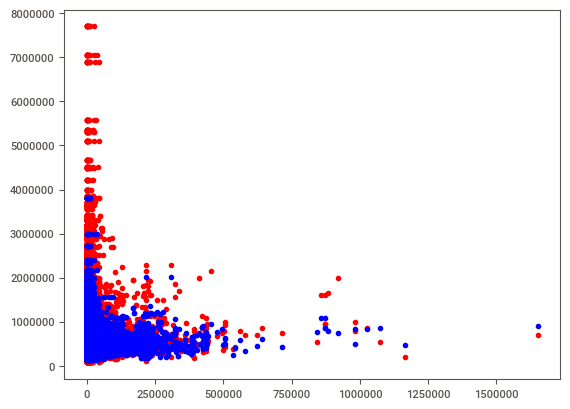

In [40]:
#Now plot the results for the best network, which achieved lowest Loss
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score  # 0.5 * ( TP/(TP+FN) + TN/(TN+FP) )

flattened_vals = [item for sublist in predicted_vals for item in sublist]
flattened_diffs = [item for sublist in predicted_diffs for item in sublist]

plt.plot(X, y, 'ro')
plt.plot(X, flattened_vals, 'bo')
plt.show()

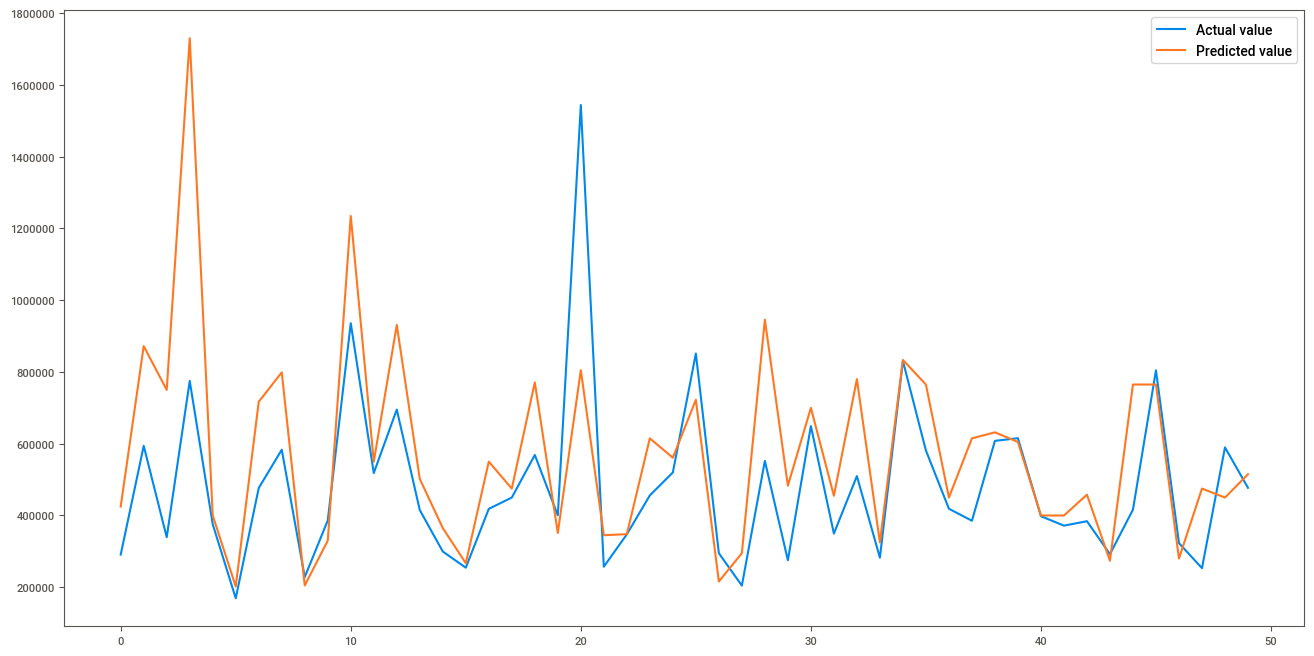

In [41]:
# criando um dataframe com y_test e dt_predicao
outcomes = pd.DataFrame({'Predicted value':flattened_vals, 'Actual value':y})
fig= plt.figure(figsize=(16,8))
outcomes = outcomes.reset_index()
outcomes = outcomes.drop(['index'],axis=1)
plt.plot(outcomes[:50])
plt.legend(['Actual value','Predicted value'])

In [42]:
final_vals = np.concatenate(flattened_vals, axis=0)
print(final_vals)

[291050.88 594009.6  339455.75 ... 400500.06 556768.7  288148.53]


In [43]:
#Add the NEW PRICE collumn

data_final = data.copy(deep=True)
data_final.loc[:, 'nn price'] = pd.Series(final_vals, index=data_final.index)
data_final.loc[:, 'nn diff'] = pd.Series(flattened_diffs, index=data_final.index)
print(data_final)

               id             date      price  bedrooms  bathrooms  \
6139   1112700170  20150227T000000   425000.0         2       1.00   
19043  2426059103  20150422T000000   872000.0         4       2.25   
13928  7228501065  20140626T000000   750000.0         4       2.75   
11673    46100350  20140630T000000  1730000.0         5       3.50   
193    3663500060  20140625T000000   400000.0         3       2.50   
...           ...              ...        ...       ...        ...   
18194  6365900065  20140718T000000   334850.0         2       1.00   
17404  3327750020  20140909T000000   347000.0         3       1.00   
14655  1257201530  20140513T000000   620000.0         3       1.00   
16189  3066410080  20140917T000000   590000.0         3       2.50   
14268  6450302546  20141021T000000   130000.0         2       1.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
6139          1300     11080     1.0           0     0  ...              0   
190

In [25]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 48.1 MB/s eta 0:00:00


In [26]:
import sweetviz as sv

nn_report = sv.analyze(data_final)

/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(d

In [ ]:
nn_report.show_html(filepath = 'NN_REPORT.html')

In [44]:
data_sample = data_final.sample(1000)

heatData = [data_sample.get('lat'), data_sample.get('long'), data_sample.get('nn diff')]

print(heatData)

[5933     47.4220
11690    47.7576
9925     47.5762
18869    47.4916
19449    47.6276
          ...   
10405    47.6848
21259    47.3139
59       47.5059
3473     47.3661
8893     47.5570
Name: lat, Length: 1000, dtype: float64, 5933    -122.321
11690   -122.318
9925    -122.239
18869   -122.082
19449   -122.053
          ...   
10405   -122.208
21259   -122.024
59      -122.149
3473    -122.021
8893    -122.163
Name: long, Length: 1000, dtype: float64, None]


In [45]:
import folium

from folium.plugins import HeatMap

data_sample = data_final.sample(1000)

mapObj = folium.Map(location=[47.477788, -121.813198], zoom_start=10)

mapObj.get_root().html.add_child(folium.Element("""
<script>
preferCanvas: true
</script>
"""
))

lats = data_sample.get('lat')
longs = data_sample.get('long')
diffs = data_sample.get('nn diff')

heatData = []

for x in range(len(data_sample)):
  folium.Marker(location=[lats.iloc[x], longs.iloc[x]],
                popup=data_sample.iloc[x]).add_to(mapObj)
  heatData.append([lats.iloc[x], longs.iloc[x], (diffs.iloc[x] - diffs.min()) / (diffs.max() - diffs.min())])

HeatMap(heatData, gradient = {
    0.0: 'blue',
    0.6: 'cyan',
    0.7: 'lime',
    0.8: 'yellow',
    1.0: 'red'
}).add_to(mapObj)

folium.LayerControl().add_to(mapObj)

mapObj.save('mapOutput.html')

mapObj

In [30]:
#Arvore de Decisao
from sklearn import tree
from sklearn.metrics import mean_absolute_percentage_error

tree_results = [0] * 5
clfs = [0] * 5

for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train = X.values[train_index]
  y_train = y.values[train_index]
  X_test = X.values[test_index]
  y_test = y.values[test_index]

  clfs[i] = tree.DecisionTreeRegressor(random_state=0,max_depth=5)
  clfs[i] = clfs[i].fit(X_train, y_train)

  result = clfs[i].predict(X_test)
  print("MAPE: ", mean_absolute_percentage_error(y_test, result))
  tree_results[i] = result

tree_results = [item for sublist in tree_results for item in sublist]

MAPE:  0.30814737065116155
MAPE:  0.3106130866163722
MAPE:  0.3041951225908122
MAPE:  0.31097716021570865
MAPE:  0.3082472110313001


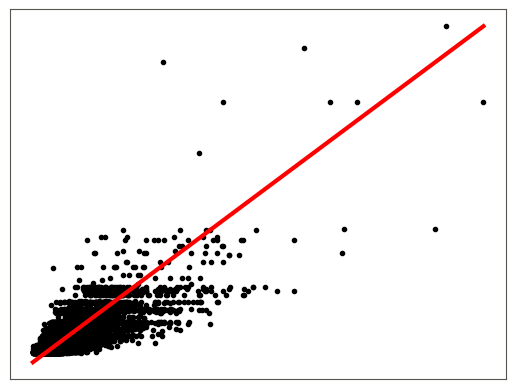

In [31]:
plt.scatter(y, tree_results, color="black")
plt.plot(np.arange(np.min(y_test),np.max(y_test)),
         np.arange(np.min(y_test),np.max(y_test)),color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [32]:
#Linear
linear_results = [[0]] * 5
linear_model = [nn.Linear(13, 1)] * 5
linear_optim = [optim.Adam(linear_model[x].parameters(), lr=0.1) for x in range(5)]
criterion = MeanAbsolutePercentageError()

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('\n[Fold ', i, ']\n')
  X_train = X.values[train_index]
  X_train = torch.tensor(X_train)
  X_train = X_train.float()

  y_train = y.values[train_index]
  y_train = torch.tensor(y_train)
  y_train = y_train.float()
    
  X_test = X.values[test_index]
  X_test = torch.tensor(X_test)
  X_test = X_test.float()

  y_test = y.values[test_index]

  linear_model[i].train()
  for epoch in range(5000):
    outputs = linear_model[i](X_train) 
    loss = criterion(outputs.flatten(), y_train)
    loss.backward()
    linear_optim[i].step()
    linear_optim[i].zero_grad()
    if (epoch+1) % 500 == 0:
      print('Epoch %d, Loss: %.4f' % (epoch+1, loss.item()))
  linear_results[i] = linear_model[i](X_test).detach().numpy()

linear_results = [item for sublist in linear_results for item in sublist]
linear_results = [item for sublist in linear_results for item in sublist]


[Fold  0 ]

Epoch 500, Loss: 0.3971
Epoch 1000, Loss: 0.2990
Epoch 1500, Loss: 0.2963
Epoch 2000, Loss: 0.2961
Epoch 2500, Loss: 0.2960
Epoch 3000, Loss: 0.2959
Epoch 3500, Loss: 0.2958
Epoch 4000, Loss: 0.2957
Epoch 4500, Loss: 0.2956
Epoch 5000, Loss: 0.2955

[Fold  1 ]

Epoch 500, Loss: 0.2954
Epoch 1000, Loss: 0.2953
Epoch 1500, Loss: 0.2953
Epoch 2000, Loss: 0.2952
Epoch 2500, Loss: 0.2952
Epoch 3000, Loss: 0.2951
Epoch 3500, Loss: 0.2951
Epoch 4000, Loss: 0.2951
Epoch 4500, Loss: 0.2950
Epoch 5000, Loss: 0.2950

[Fold  2 ]

Epoch 500, Loss: 0.2957
Epoch 1000, Loss: 0.2956
Epoch 1500, Loss: 0.2956
Epoch 2000, Loss: 0.2955
Epoch 2500, Loss: 0.2955
Epoch 3000, Loss: 0.2954
Epoch 3500, Loss: 0.2954
Epoch 4000, Loss: 0.2954
Epoch 4500, Loss: 0.2953
Epoch 5000, Loss: 0.2953

[Fold  3 ]

Epoch 500, Loss: 0.2942
Epoch 1000, Loss: 0.2942
Epoch 1500, Loss: 0.2941
Epoch 2000, Loss: 0.2941
Epoch 2500, Loss: 0.2940
Epoch 3000, Loss: 0.2940
Epoch 3500, Loss: 0.2940
Epoch 4000, Loss: 0.2939
Ep

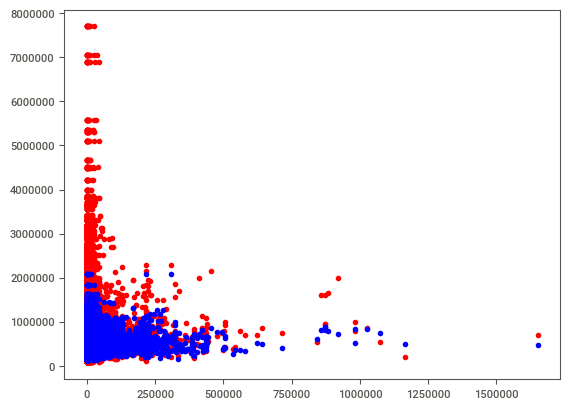

In [33]:
plt.plot(X, y, 'ro')
plt.plot(X, linear_results, 'bo')
plt.show()

In [34]:
data_extra = data_final.copy(deep=True)

data_extra = data_extra.drop('nn diff', axis=1)
data_extra.loc[:, 'tree price'] = pd.Series(tree_results, index=data_extra.index)
data_extra.loc[:, 'linear price'] = pd.Series(linear_results, index=data_extra.index)
print(data_extra)

               id             date      price  bedrooms  bathrooms  \
6139   1112700170  20150227T000000   425000.0         2       1.00   
19043  2426059103  20150422T000000   872000.0         4       2.25   
13928  7228501065  20140626T000000   750000.0         4       2.75   
11673    46100350  20140630T000000  1730000.0         5       3.50   
193    3663500060  20140625T000000   400000.0         3       2.50   
...           ...              ...        ...       ...        ...   
18194  6365900065  20140718T000000   334850.0         2       1.00   
17404  3327750020  20140909T000000   347000.0         3       1.00   
14655  1257201530  20140513T000000   620000.0         3       1.00   
16189  3066410080  20140917T000000   590000.0         3       2.50   
14268  6450302546  20141021T000000   130000.0         2       1.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  yr_built  \
6139          1300     11080     1.0           0     0  ...      1955   
19043        

In [35]:
extra_report = sv.analyze(data_extra)
extra_report.show_html(filepath = 'EXTRA_REPORT.html')

/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(d

Report EXTRA_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
